In [1]:
import glob
import os
os.chdir('../') # important if this notebook is not in main but in notebooks folder

from gerda.core.virusPropagationModel import *

import gerda.utilities.VPM_plotting as vpm_plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import geopandas as gpd
#%load_ext memory_profiler

%matplotlib inline
%load_ext autoreload

In [2]:
os.listdir()

['R_GangeltSimulation_CloseAll200_1.csv',
 'gangelt_1_zoom1_map.png',
 'Demo_Vaccination.ipynb',
 'simulate_scenarios_parameter_scan_local.py',
 'saved_objects',
 'R_GangeltSimulation_CloseAll200ReopenPublic500.csv',
 'Demo_new_strain.ipynb',
 'do_heatmaps.ipynb',
 'location_1.py',
 'para_results.svg',
 'R_plot.svg',
 'test_infection_network_time.gexf',
 'R_per_schedule_type.ipynb',
 'Lockdown_Time_Death.svg',
 'R_GangeltSimulation_CloseAll200ReopenAll500.csv',
 'InfectionStuff_Timecourse_FullLockdown.csv',
 'Test_R_values',
 'status_timc.png',
 '.DS_Store',
 'Connectivity_Matrix.ipynb',
 'G.csv',
 'Analysis',
 'schedule18.0.csv',
 'gangelt_location_type_map.png',
 'FilesToFix',
 '.README.md.swp',
 'cache',
 'LICENSE',
 'ContactStuff_AgentsType.csv',
 'distribution_of_location_types.png',
 'Reopening_Time.svg',
 'edges.txt.png',
 'R_GangeltSimulation_03.csv',
 'secondary_cases.png',
 'test_debugger',
 'Untitled.ipynb',
 'Ini_ideas.ipynb',
 '.vscode_old',
 'gangelt_1_gray_map.png',
 'Pl

In [4]:
geopath = 'input_data/geo/'
geofiles = {0:'Buildings_Bad_Feilnbach_MA_0_5.csv',
            1:'Buildings_Bad_Feilnbach_MA_1.csv',
            2:'Buildings_Bad_Feilnbach_MA_3.csv',
            3:'Buildings_Gangelt_MA_0_5.csv',
            4:'Buildings_Gangelt_MA_1.csv',
            5:'Buildings_Gangelt_MA_3.csv',}
geofileID = 5

In [4]:
mainModelCmap = cm.get_cmap('Set1')  # for our statuses and flags
statusAndFlagsColors = {
    'I': mainModelCmap(0),  # red
    'S': mainModelCmap(1),  # blue
    'R': mainModelCmap(2),  # green
    'D': 'black',

    'IsInfected': mainModelCmap(0),  # red
    'WasInfected': mainModelCmap(0),  # red
    'WasDiagnosed': mainModelCmap(4),  # blue
    'Diagnosed': mainModelCmap(4),  # orange
    'Hospitalized': mainModelCmap(6),  # brown
    'WasHospitalized': mainModelCmap(6),
    'WasICUed': mainModelCmap(7),
    'ICUed': mainModelCmap(7),  # pink
}


locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}

###### initialize small Gangelt

In [5]:
%prun modeledWorld1 = ModeledPopulatedWorld(1000,5, world_from_file=True, geofile_name=geopath+geofiles[geofileID], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld1.number_of_people
print('Number of agents: '+ str(n_people))

 Number of agents: 1057


###### initialize large Gangelt

In [6]:
modeledWorld2 = ModeledPopulatedWorld(1000,5, world_from_file=True, geofile_name=geopath+geofiles[4], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld2.number_of_people
print('Number of agents: '+ str(n_people))


Number of agents: 10141


### Modeled World 

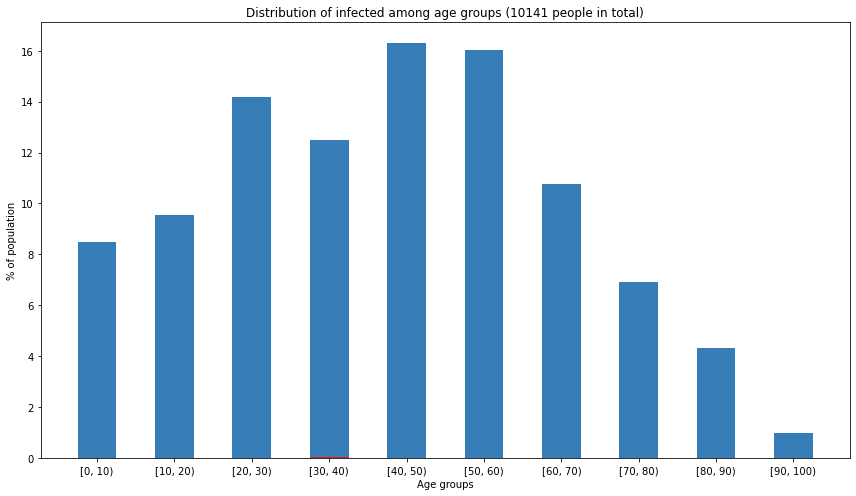

In [7]:
modeledWorld2.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

##### Information Dataframes for agents and locations

In [8]:
df_loc = modeledWorld2.get_agent_info()
df_loc.head(4)

,ID,Age,Home,Type,Interaction Modifier
0,3495,28,1760,public_worker,1
1,3497,59,1760,adult,1
2,3502,6,1765,under_age,1
3,3563,20,1795,teacher,1


In [9]:
df_ag = modeledWorld2.get_location_info()
df_ag.head(4)

,ID,Type,Area,Coordinates,Neighbourhood
0,0,work,7.679213e-07,"(5.988613849926164, 50.99435715575597)",3
1,1,work,2.035797e-07,"(5.9866766225745485, 50.9947386746526)",3
2,2,work,1.906354e-07,"(5.987261198255958, 50.99408186681645)",3
3,3,work,8.218644e-08,"(5.985594593704045, 50.99417663783578)",3


In [10]:
modeledWorld1.get_distribution_of_location_types()

,hospital,morgue,mixing_loc,work,public,school,home
0,1,1,1,47,22,2,491


In [11]:
modeledWorld2.get_distribution_of_schedule_types(relative=True)

,teacher,pensioner,under_age,public_worker,medical_professional,adult
0,0.014496,0.142096,0.166256,0.138152,0.007692,0.531309


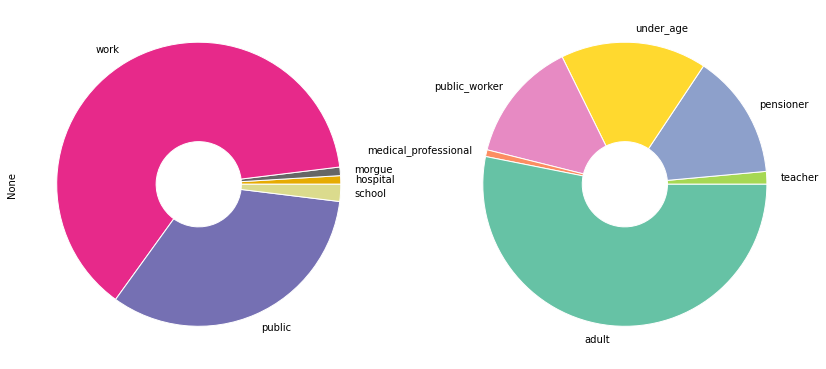

In [12]:
modeledWorld2.plot_locations_and_schedules(locs_to_hide=['home','mixing_loc'])

### simulations
add description and instructions

In [13]:
simulation_inf_ini = Simulation(modeledWorld1,400,run_immediately=False)
simulation_inf_ini.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation_inf_ini.interaction_frequency=2
%prun -s cumtime simulation_inf_ini.simulate()
simulation2 = Simulation(simulation_inf_ini,100)

(<matplotlib.axes._subplots.AxesSubplot at 0x144062970>,
               values  positive
 home       -0.549027     False
 hospital   -0.001770     False
 mixing_loc -0.001770     False
 public      0.401062      True
 school     -0.003540     False
 work        0.156814      True)

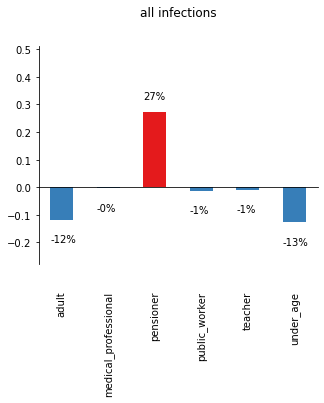

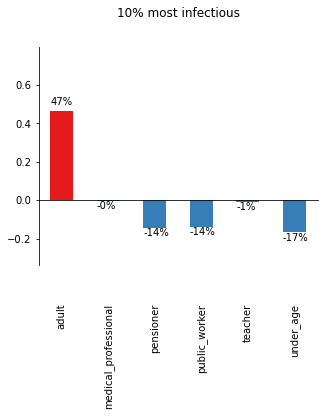

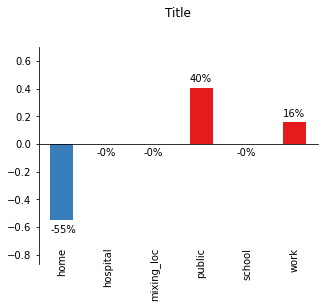

In [14]:
simulation2 = Simulation(modeledWorld1,400,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation2.interaction_frequency=2
simulation2.simulate()
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, label_offset=0.04, title='all infections')
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, fraction_most_infectious=0.1, title='10% most infectious', label_offset=0.02)
simulation2.plot_infections_per_location_type_delta(modeledWorld1,relative=False, label_offset=0.04)

#### plot statii on map

In [16]:
geofilenames = {1:'_Gangelt_MA_3', 2:'_Gangelt_MA_1',3:'_Heinsberg_MA_3', 4:'_Bad_Feilnbach_MA_0_5'}
geoID = 2

area = gpd.read_file('input_data/geo/Area'+ geofilenames[geoID] + '.geojson')
buildings = gpd.read_file('input_data/geo/Buildings' + geofilenames[geoID] + '.geojson')
streets = gpd.read_file('input_data/geo/Streets' + geofilenames[geoID] +'.geojson')

In [17]:
steps = simulation_inf_ini.time_steps
list(range(steps))[-2:]

[398, 399]

In [18]:
steps = simulation_inf_ini.time_steps
town = 'Gangelt'
#stats= ['I','R','S','D']
stats= ['I']#,'R','S','D']

#cmap2 = cm.get_cmap('Set1')
#statusAndFlagsColors[stat]

for i,stat in enumerate(stats):
    #for time in list(range(steps))[-50:-49]:
            #stat='I'
            time=399
            loc_stat_t = df_loc_stat[df_loc_stat['time']==time]

            fig,ax = plt.subplots(1, figsize=(15,7))#plt.figure(figsize=(15,7))
            ax = plt.subplot()
            #cmap = cm.get_cmap('Dark2')
            area.plot(ax=ax, color='k' ,alpha=0.05)
            streets.plot(ax=ax, color='k', alpha=0.1)
            buildings.plot(ax=ax, color='gray')#cmap='Dark2')

            ax.scatter(loc_stat_t['x_coordinate'],loc_stat_t['y_coordinate'],
                       s = 20*loc_stat_t[stat], alpha=0.5,
                       label=stat, color=statusAndFlagsColors[stat])
            #plt.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H')
            plt.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M')
            #for k,stat in enumerate(['R','S','I','D']):
                #plt.subplot(2,2,k+1)
                #plt.title(stat)
                #plt.scatter(loc_stat_t['x_coordinate'],loc_stat_t['y_coordinate'], s = 20*loc_stat_t[stat], alpha=0.3, label=stat, color=cmap(k))
            #plt.suptitle('status at time '+str(time))
            plt.title(str(stat)+' in '+town+' at '+str(time)+' h')
            plt.tight_layout()
            #plt.legend()
            plt.savefig('plots/Infection_MAP.svg')
            plt.savefig('plots/Infection_MAP.png', dpi=300)

NameError: name 'df_loc_stat' is not defined

In [19]:
steps = simulation_inf_ini.time_steps
town = 'Gangelt'
#stats= ['I','R','S','D']
stats= ['I']#,'R','S','D']

#cmap2 = cm.get_cmap('Set1')
#statusAndFlagsColors[stat]

for i,stat in enumerate(stats):
    for time in list(range(steps))[-50:-49]:
            #stat='I'
            loc_stat_t = df_loc_stat[df_loc_stat['time']==time]

            fig,ax = plt.subplots(1, figsize=(15,7))#plt.figure(figsize=(15,7))
            ax = plt.subplot()
            #cmap = cm.get_cmap('Dark2')
            area.plot(ax=ax, color='k' ,alpha=0.05)
            streets.plot(ax=ax, color='k', alpha=0.1)
            buildings.plot(ax=ax, color='gray')#cmap='Dark2')

            ax.scatter(loc_stat_t['x_coordinate'],loc_stat_t['y_coordinate'],
                       s = 20*loc_stat_t[stat], alpha=0.5,
                       label=stat, color=statusAndFlagsColors[stat])
            #plt.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H')
            plt.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M')
            #for k,stat in enumerate(['R','S','I','D']):
                #plt.subplot(2,2,k+1)
                #plt.title(stat)
                #plt.scatter(loc_stat_t['x_coordinate'],loc_stat_t['y_coordinate'], s = 20*loc_stat_t[stat], alpha=0.3, label=stat, color=cmap(k))
            #plt.suptitle('status at time '+str(time))
            plt.title(str(stat)+' in '+town+' at '+str(time)+' h')
            plt.tight_layout()
            #plt.legend()
            plt.savefig('plots/Infection_MAP.png')
            #plt.close()


NameError: name 'df_loc_stat' is not defined

##### homogenous mixing

(<matplotlib.axes._subplots.AxesSubplot at 0x1a2c4fff50>,
               values  positive
 home       -0.868794     False
 hospital   -0.001773     False
 mixing_loc  0.998227      True
 public     -0.030142     False
 school     -0.003546     False
 work       -0.092199     False)

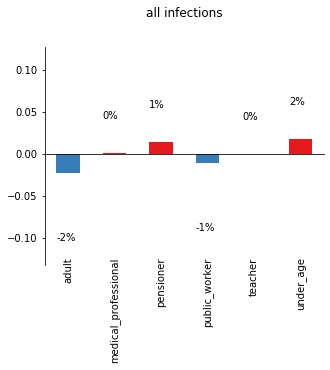

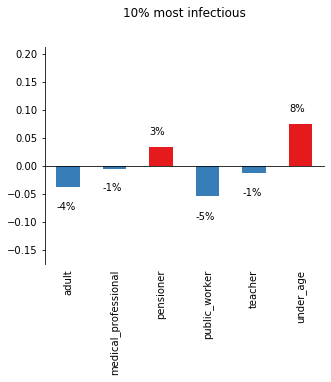

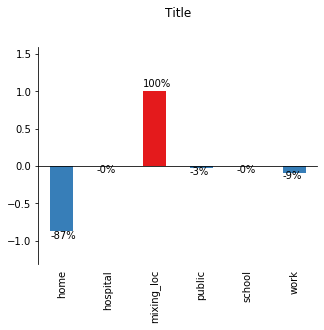

In [11]:
simulation3=Simulation(modeledWorld1,500,run_immediately=False)
simulation3.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation3.interaction_frequency=2
simulation3.set_homogeneous_mixing()
simulation3.simulate()
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, label_offset=0.04, title='all infections')
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, fraction_most_infectious=0.1, title='10% most infectious', label_offset=0.02)
simulation3.plot_infections_per_location_type_delta(modeledWorld1,relative=False, label_offset=0.04)

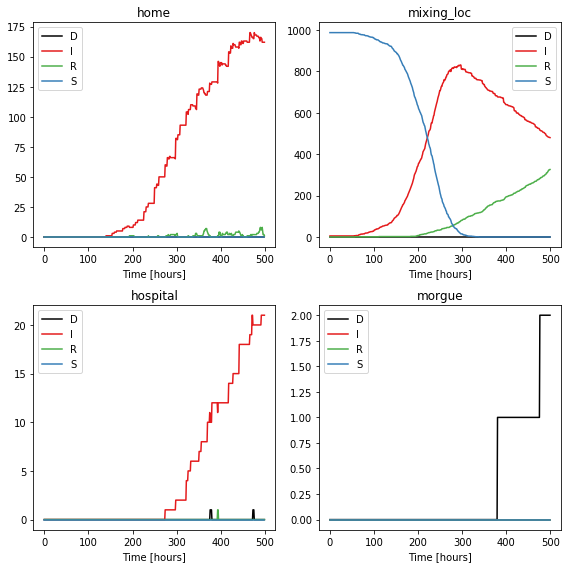

In [12]:
simulation3.plot_status_at_location()

#####  contact informations 

In [12]:
df1, df2 = simulation2.get_contact_distributions(max_t=168)

NameError: name 'simulation2' is not defined

In [11]:
df1.head(4)

NameError: name 'df1' is not defined

In [ ]:
df2.head(4)

###### infection informations

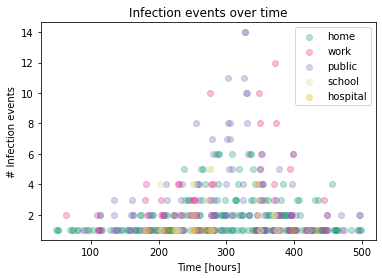

In [27]:
simulation2.plot_infections_per_location_type_over_time()

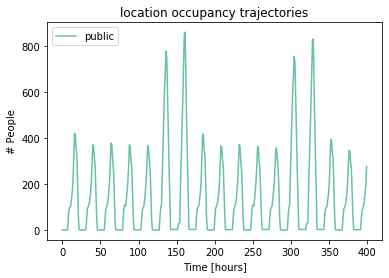

In [16]:
simulation2.plot_location_type_occupancy_timecourse(specific_types=['public'])

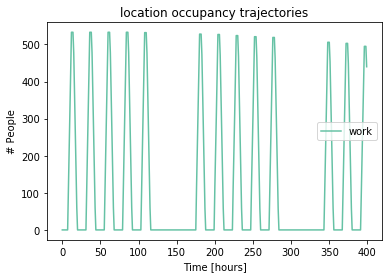

In [17]:
simulation2.plot_location_type_occupancy_timecourse(specific_types=['work'])

In [26]:
contact_df = simulation2.get_contact_distributions()

### equal interaction frequency

In [47]:
simulation1 = Simulation(modeledWorld1,1000,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_frequency=2
simulation1.simulate()

mean IF: 1.0


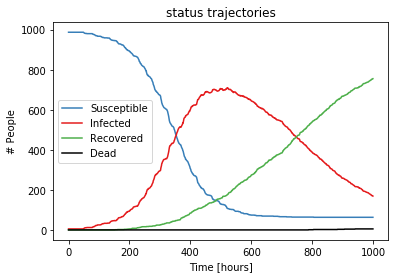

In [40]:
print('mean IF: '+ str(sum([p.interaction_modifier for p in simulation1.people])/n_people))
simulation1.plot_status_timecourse()

(<matplotlib.axes._subplots.AxesSubplot at 0x1a4251b310>,
                         values  positive
 adult                 0.060454      True
 medical_professional  0.001701      True
 pensioner            -0.093412     False
 public_worker         0.000381      True
 teacher              -0.004116     False
 under_age             0.034992      True)

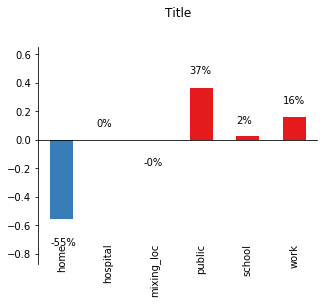

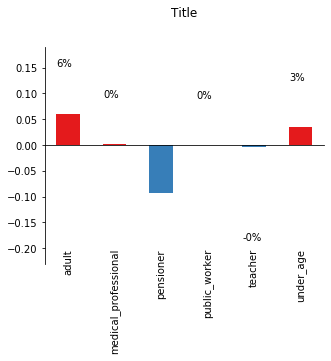

In [45]:
simulation1.plot_infections_per_location_type_delta(modeledWorld1)
simulation1.plot_infections_per_schedule_type_delta(modeledWorld1)

In [65]:
IF = 2 

#def set_IM(IM, Id_list):
#    n_1 = [p.IF=1 for p in modeledWorld1.people if p in Id_list]
    

### increased  interaction frequency for young agents

In [ ]:
im = 1.5 # set interaction_modifier of agents to im 
min_age = -1
max_age = 26
p_subset_ids = [p.ID for p in world.people if (p.age > min_age) & (p.age < max_age)]
modeledworld1.set_im_for_subset(im, id_list=p_subset_ids, keep_average=True)


test adjustment of interaction_modifier

In [103]:
agent_info_df = modeledWorld1.get_agent_info()
agent_info_df.groupby('Interaction Modifier').count()

,ID,Age,Home,Type
Interaction Modifier,,,,
0.770756,741,741,741,741
2.000000,251,251,251,251


In [102]:
age = 25
n_people = modeledWorld1.number_of_people
#kids = [p.ID for p in modeledWorld1.people if p.age<25]
#n_kids = len(kids)
rest = [p.ID for p in modeledWorld1.people if p.age>20]
n_rest = (len(rest))
if_rest = (1 - IF)*n_people/n_rest+IF #(1*n_people - if_kids*(n_people-n_rest))/*n_rest =
simulation2 = Simulation(modeledWorld1, 500, run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}}) 
[setattr(p, 'interaction_modifier', IF ) for p in simulation2.people if p.age<age+1]
[setattr(p, 'interaction_modifier', if_rest ) for p in simulation2.people if p.age>age]
simulation2.interaction_frequency = 2
simulation2.simulate()

In [95]:
str(sum([p.interaction_modifier for p in simulation2.people])/n_people)

'2.0'

mean IF: 1.0817843866171162
IF: 2
IF_REST: 0.7707558859975217
ratio of people with increased IF:0.186491935483871


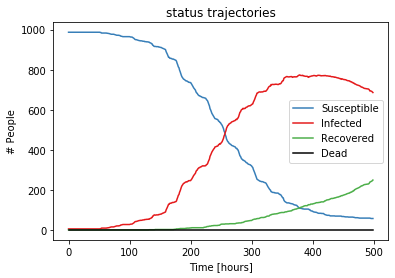

In [104]:
print('mean IF: '+ str(sum([p.interaction_modifier for p in simulation2.people])/n_people))
print('IF: ' + str(IF))
print('IF_REST: ' + str(if_rest))
print('ratio of people with increased IF:'+str(1-n_rest/n_people))
simulation2.plot_status_timecourse()

(<matplotlib.axes._subplots.AxesSubplot at 0x1a42140f50>,
                         values  positive
 adult                -0.068011     False
 medical_professional -0.002583     False
 pensioner            -0.086699     False
 public_worker        -0.007946     False
 teacher              -0.000820     False
 under_age             0.166058      True)

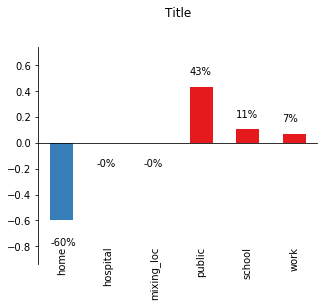

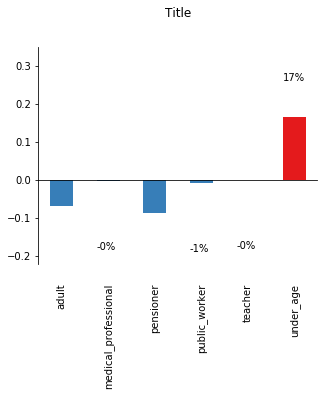

In [105]:
simulation2.plot_infections_per_location_type_delta(modeledWorld1)
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1)

### decreased  interaction frequency for older agents 

In [109]:
IF=0.5
age = 65
n_people = modeledWorld1.number_of_people
rest = [p.ID for p in modeledWorld1.people if p.age<age+1]
n_rest = (len(rest))
if_rest = (1 - IF)*n_people/n_rest+IF #(1*n_people - if_kids*(n_people-n_rest))/*n_rest =
simulation3 = Simulation(modeledWorld1,1000,run_immediately=False)
simulation3.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}}) 
[setattr(p, 'interaction_modifier', IF ) for p in simulation3.people if p.age>age]
[setattr(p, 'interaction_modifier', if_rest ) for p in simulation3.people if p.age<age+1]
simulation3.interaction_frequency = 2
simulation3.simulate()

mean IF: 1.0000000000000155
IF: 0.5
IF_REST: 1.1153846153846154
ratio of people with increased IF:0.1875


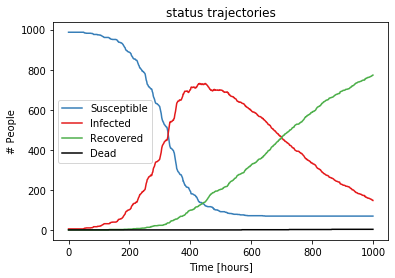

In [110]:
print('mean IF: '+ str(sum([p.interaction_modifier for p in simulation3.people])/n_people))
print('IF: ' + str(IF))
print('IF_REST: ' + str(if_rest))
print('ratio of people with increased IF:'+str(1-n_rest/n_people))
simulation3.plot_status_timecourse()

(<matplotlib.axes._subplots.AxesSubplot at 0x1a3fd27450>,
                         values  positive
 adult                 0.032080      True
 medical_professional -0.002648     False
 pensioner            -0.117476     False
 public_worker         0.015396      True
 teacher               0.008426      True
 under_age             0.064222      True)

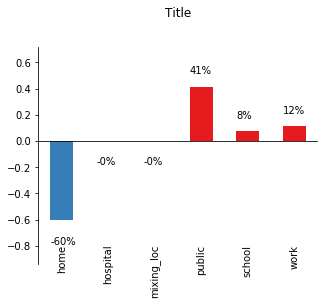

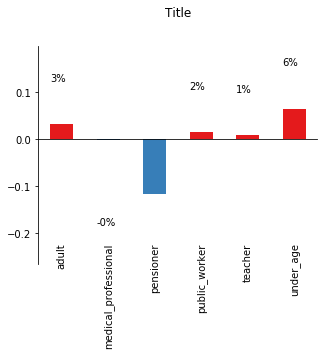

In [111]:
#simulation3.plot_infections_per_location_type(relative_to_building_number=False)
simulation3.plot_infections_per_location_type_delta(modeledWorld1)
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1)

#### combined 

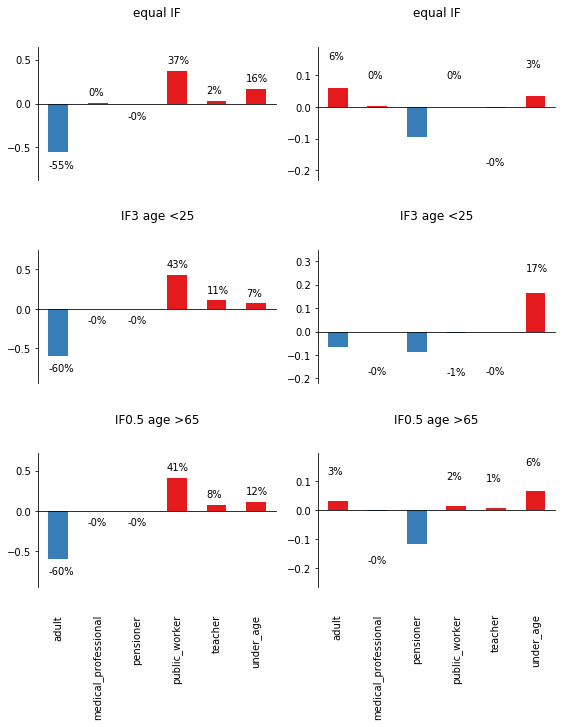

In [131]:
fig,axes =plt.subplots(3,2, figsize=(8,10), sharex=True,)  #sharey=True)

simulation1.plot_infections_per_location_type_delta(modeledWorld1, ax=axes[0][0], title='equal IF')
simulation1.plot_infections_per_schedule_type_delta(modeledWorld1, ax=axes[0][1], title='equal IF')

simulation2.plot_infections_per_location_type_delta(modeledWorld1, ax=axes[1][0], title='IF3 age <25')
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1, ax=axes[1][1], title='IF3 age <25')

simulation3.plot_infections_per_location_type_delta(modeledWorld1, ax=axes[2][0], title='IF0.5 age >65')
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1, ax=axes[2][1], title='IF0.5 age >65')
plt.tight_layout()

In [150]:
def set_im_for_subset(world, im, id_list, keep_average=True): 
    
    [setattr(p, 'interaction_modifier', im ) for p in world.people if p.ID in id_list]
    
    if keep_average:
        n_people = modeledWorld1.number_of_people
        rest = [p.ID for p in modeledWorld1.people if p.ID not in id_list]
        n_rest = len(rest)
        im_rest = (1 - im)*n_people/n_rest+im
        [setattr(p, 'interaction_modifier', im_rest ) for p in world.people if p.ID not in id_list]
        
def get_ids_in_agerange(world, age(()):
                        pass
    
    

    

In [151]:


mw = copy.deepcopy(modeledWorld1)
l = np.arange(0,300,1)
set_im_for_subset(mw, 2, l, keep_average=True) 

agent_info_list  = [{'ID':p.ID ,
                     'Age':p.age ,
                     'Home': p.home.ID,
                     'Type':p.type,
                     'Interaction Modifier': p.interaction_modifier}
                    for p in mw.people]
agent_info_df = pd.DataFrame(agent_info_list)
agent_info_df.groupby('Interaction Modifier').count()



0.5685425685425685


,ID,Age,Home,Type
Interaction Modifier,,,,
0.568543,693,693,693,693
2.000000,299,299,299,299


### intercation frequence human dependent

In [406]:
time=125
df_red= df_c[df_c['time']>time]
df_all= df_red.groupby('infected_by_ID').count()
df_all.sort_values(by='h_ID')/20#/len(df_list)


,h_ID,infection_loc_ID,time
infected_by_ID,,,
981,0.05,0.05,0.05
520,0.05,0.05,0.05
163,0.05,0.05,0.05
334,0.05,0.05,0.05
333,0.05,0.05,0.05
...,...,...,...
364,0.85,0.85,0.85
258,0.90,0.90,0.90
307,1.00,1.00,1.00


In [32]:
group_list = [x[x['time']>100].groupby('infected_by_ID').count().sort_values('h_ID') for x in df_list]

KeyError: 'time'

In [326]:
type_ratio_inf_dict.values()

dict_values([0.105, 0.02, 0.6, 0.19, 0.005, 0.08])

In [156]:
modeledWorld1.

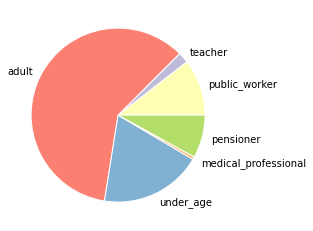

In [408]:
cmap = plt.get_cmap("Set3")
colors = cmap(np.arange(1,len(type_ratio_inf_dict.values())+3))

plt.pie(type_ratio_inf_dict.values(),labels=type_ratio_inf_dict.keys(), radius=1, colors=colors,
       wedgeprops=dict(width=1, edgecolor='w'))
plt.savefig('plots/agents_types.png',bbox_inches='tight')

NameError: name 'group_list' is not defined

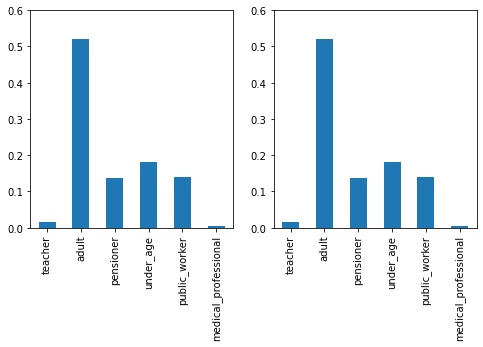

In [30]:
fig, axes =plt.subplots(1,2,figsize=(8,4))
ax1 = axes[0]
ax2 = axes[1]
ax1.set_ylim(0,0.6), ax2.set_ylim(0,0.6)

##world
types = set([p.type for p in world.people])
n_people =  len(world.people)
type_ratio_dict = {t: sum([1 for p in world.people if p.type==t])/n_people for t in types}
df1 = pd.DataFrame([type_ratio_dict])
df_m = df1.mean()
df_m.columns=['']
df_m.plot(kind='bar', ax=ax1)
df_m.plot(kind='bar', ax=ax2)
#axes[0].bar(range(len(type_ratio_dict)),type_ratio_dict.values())
#axes[0].set_xticklabels(['']+list(type_ratio_dict.keys()), rotation=20)

### most infected [1,2,3,4,]
nr_most_inf_p = 100
type_ratio_inf_list = []
for df in group_list:
    type_list_inf = [p.type for p in world.people if p.ID in df[:nr_most_inf_p].index.values]
    type_ratio_inf_list.append({t: len([1 for x in type_list_inf if x==t])/nr_most_inf_p for t in types})
df = pd.DataFrame(type_ratio_inf_list)    
df.mean().plot(kind='bar', ax=ax1,color='r',alpha=0.5, title='most infectious agents')
ax.set_ylabel('fraction')
#axes[1].bar(range(len(type_ratio_inf_dict)),type_ratio_inf_dict.values())
#axes[1].set_xticklabels(['']+list(type_ratio_inf_dict.keys()), rotation=20)
plt.savefig('plots/most_infectious_agents.png',bbox_inches='tight')

### most infected random
nr_most_inf_p = 100
type_ratio_inf_list = []
for df in group_list:
    type_list_inf = [p.type for p in world.people if p.ID in df[:nr_most_inf_p].index.values]
    type_ratio_inf_list.append({t: len([1 for x in type_list_inf if x==t])/nr_most_inf_p for t in types})
df = pd.DataFrame(type_ratio_inf_list)    
df.mean().plot(kind='bar', ax=ax1,color='r',alpha=0.5, title='most infectious agents')
ax.set_ylabel('fraction')
#axes[1].bar(range(len(type_ratio_inf_dict)),type_ratio_inf_dict.values())
#axes[1].set_xticklabels(['']+list(type_ratio_inf_dict.keys()), rotation=20)
plt.savefig('plots/most_infectious_agents.png',bbox_inches='tight')

In [309]:
#plt.bar(range(len(type_ratio_dict)),type_ratio_dict.values())
sns.pie(data=df)
#plt.xticks(range(len(type_ratio_dict.keys())),list(type_ratio_dict.keys()), rotation=20)

AttributeError: module 'seaborn' has no attribute 'pie'

In [84]:
#for df in group_list:
# 
i=10
group_list[0][-i:]
#worldsV2Gangelt_MA_3_3_worldObj.pkl
types = set([p.type for p in world.people])
most_infectious_p = list(np.arange(6,120,4))
cs=['r','b','k','g','r','b','k']

for k,df in enumerate(group_list[1]):
    l = []
    for i in most_infectious_p:
        l.append([p.type for p in world.people if p.ID in df[-i:].index.values])

    l_dict = {}
    for t in types:
        l_dict[t]=[x.count(t) for x in l]

    
    for i,t in enumerate(l_dict):
        plt.plot(most_infectious_p,np.array(l_dict[t])/most_infectious_p, label=t, c=cs[i],alpha=0.2)

for t in types:
    plt.plot(most_infectious_p,np.array(l_dict[t])/most_infectious_p, label=t, c=cs[i],alpha=0.2)

NameError: name 'group_list' is not defined

In [191]:
fs= os.listdir(folder)
df_list = [pd.read_csv(folder+f) for f in fs if 'information' in f]
df_c =pd.concat(df_list, ignore_index=True, sort=True)

df_new = df_c[df_c['time']>200].groupby('infected_by_ID').count()
df_all = df_new.sort_values(by='h_ID')#/len(df_list)
df_all

,h_ID,infection_loc_ID,time
infected_by_ID,,,
236,1,1,1
512,1,1,1
886,1,1,1
36,1,1,1
224,1,1,1
...,...,...,...
622,51,51,51
641,52,52,52
521,59,59,59


In [192]:
w_list = os.listdir('saved_objects/worldsV2/')
world = load_simulation_object('worldsV2Gangelt_MA_3_3_worldObj.pkl', folder='saved_objects/worldsV2/')
n_p = len(world.people)
print(n_p)

1028


In [193]:
#worldsV2Gangelt_MA_3_3_worldObj.pkl
types = set([p.type for p in world.people])
most_infectious_p = list(np.arange(6,120,4))
l = []
for i in most_infectious_p:
    l.append([p.type for p in world.people if p.ID in df_all[-i:].index.values])

    

In [194]:
l_dict = {}
for t in types:
    l_dict[t]=[x.count(t) for x in l]

Text(0, 0.5, 'fraction of type')

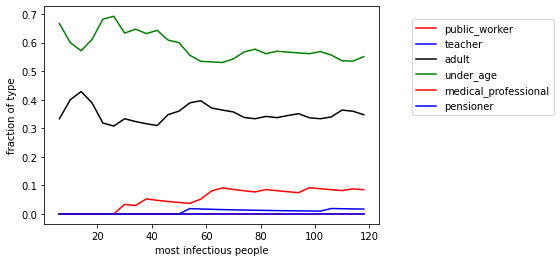

In [195]:
cs=['r','b','k','g','r','b','k']
for i,t in enumerate(l_dict):
    plt.plot(most_infectious_p,np.array(l_dict[t])/most_infectious_p, label=t, c=cs[i])
    #plt.plot(most_infectious_p, [sum([1 for p in world.people if p.type==t])/n_p]*len(most_infectious_p),'--',color=cs[i])
    
plt.legend(loc=(1.1,0.5))
plt.xlabel('most infectious people')
plt.ylabel('fraction of type')

In [91]:
import networkx as nx
G = nx.Graph()
for i in range(len(df_all)):
    a=df.iloc[i]['h_ID']
    b=df.iloc[i]['infected_by_ID']
    G.add_edge(a, b)
#G.add_edge('B', 'D', weight=2)
#G.add_edge('A', 'C', weight=3)
#G.add_edge('C', 'D', weight=4)
#nx.shortest_path(G, 'A', 'D', weight='weight')
#['A', 'B', 'D']

In [98]:
nx.to_edgelist(G)

EdgeDataView([(5, 4, {}), (5, 972, {}), (5, 346, {}), (4, 130, {}), (4, 891, {}), (4, 494, {}), (634, 3, {}), (634, 636, {}), (634, 933, {}), (634, 422, {}), (634, 74, {}), (634, 991, {}), (3, 275, {}), (3, 633, {}), (3, 851, {}), (3, 702, {}), (130, 719, {}), (130, 822, {}), (436, 2, {}), (2, 101, {}), (2, 266, {}), (2, 146, {}), (2, 228, {}), (2, 718, {}), (2, 606, {}), (2, 666, {}), (275, 276, {}), (275, 625, {}), (101, 103, {}), (101, 102, {}), (101, 644, {}), (101, 104, {}), (101, 470, {}), (266, 267, {}), (266, 523, {}), (266, 963, {}), (633, 635, {}), (633, 457, {}), (633, 185, {}), (633, 84, {}), (633, 141, {}), (633, 6, {}), (633, 618, {}), (633, 820, {}), (633, 1005, {}), (719, 278, {}), (719, 443, {}), (851, 920, {}), (851, 1004, {}), (851, 852, {}), (851, 853, {}), (851, 720, {}), (851, 384, {}), (851, 472, {}), (851, 1020, {}), (851, 743, {}), (851, 64, {}), (851, 964, {}), (851, 756, {}), (851, 925, {}), (702, 869, {}), (702, 610, {}), (702, 788, {}), (702, 799, {}), (636

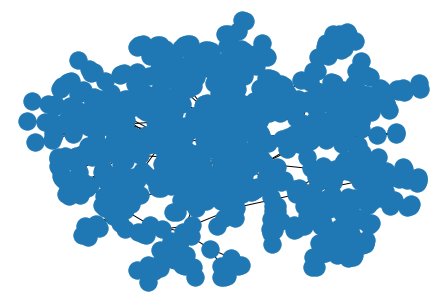

In [95]:
nx.draw(G, font_weight='bold', size=1, pos=nx.spring_layout(G))

### Rest

In [50]:
normal = [p.interaction_modifier for p in simulation1.people]
kids = [p.interaction_modifier for p in simulation2.people]
old = [p.interaction_modifier for p in simulation3.people]
print('normal:'+str(sum(normal))+'  kids:'+str(sum(kids))+'  old:'+str(sum(old)))

normal:1533  kids:4343  old:1533


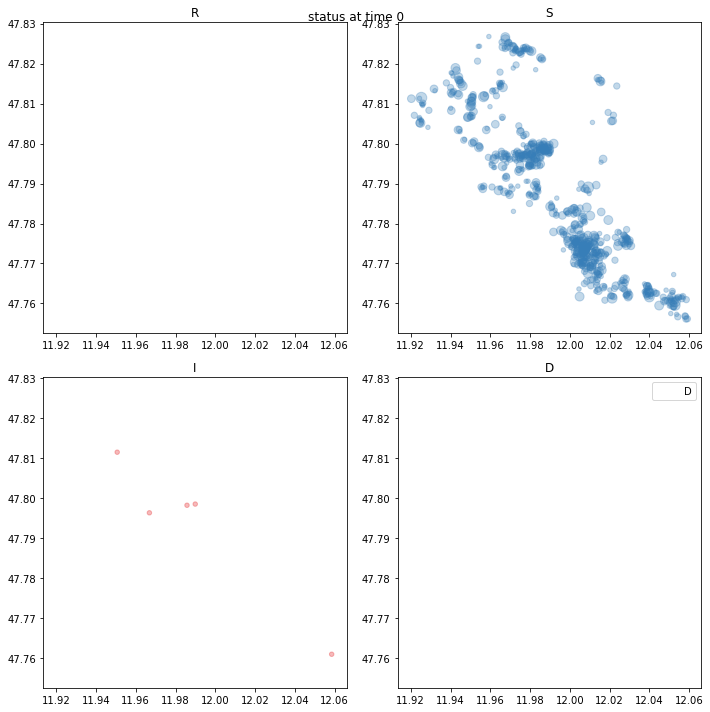

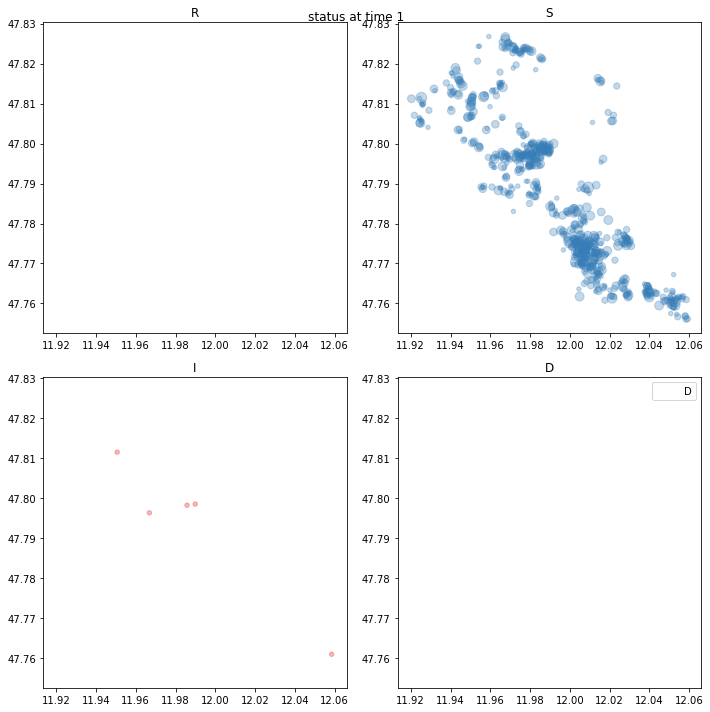

In [8]:
simulation1.map_status_at_loc()

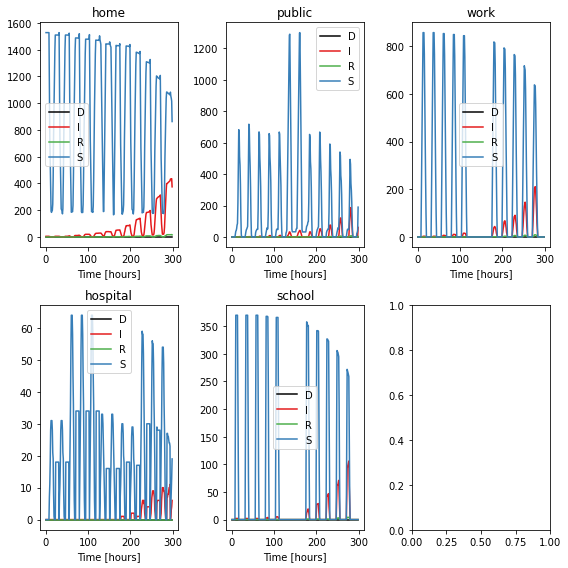

In [7]:
simulation1.plot_status_at_location()

In [154]:
mu_list=np.arange(1,79,20)
mu_dict={}
mu_list

array([ 1, 21, 41, 61])

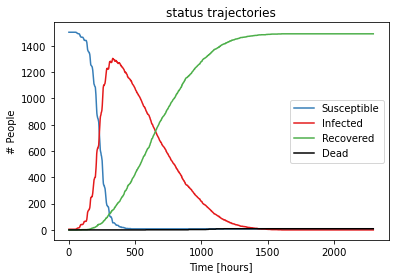

(array([7.42623e+05, 5.32476e+05, 5.04793e+05, 2.99938e+05, 1.99513e+05,
        1.31921e+05, 8.78040e+04, 4.97660e+04, 2.43740e+04, 0.00000e+00,
        1.08620e+04, 4.46300e+03, 1.54300e+03, 5.12000e+02, 1.69000e+02,
        4.90000e+01, 9.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ,
        10.9, 11.8, 12.7, 13.6, 14.5, 15.4, 16.3, 17.2, 18.1, 19. ]),
 <a list of 20 Patch objects>)

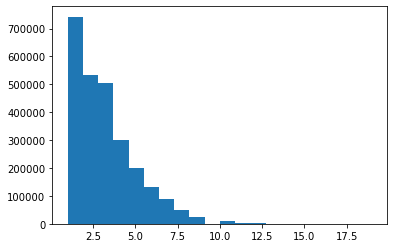

In [38]:
simulation1 = Simulation(modeledWorld1,800,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_frequency=5
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=500
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()
df= simulation1.simulation_timecourse
### interactions
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections,bins=20)

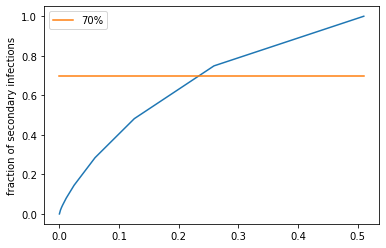

In [130]:
###plot ratio
secondary_infs.sort(reverse=True)
sum_inf = [sum(secondary_infs[0:x]) for x in range(len(secondary_infs))]
plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),np.array(sum_inf)/max(sum_inf))
plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.7]*len(sum_inf), label='70%')
plt.ylabel('fraction of secondary infections')
plt.xlabel('')
plt.legend()


In [152]:
for dict_,k in enumerate([mu_dict, mu_dict_05]):
    for mu in dict_:
        df_1=mu_dict[mu]
        df=df_1#df_1[df_1['time']<700]
        infections = df[df['Infection_event']>0]
        spreader = list(infections['Infection_event'].values)
        spreader_ids=list(set(spreader))
        secondary_infs=[spreader.count(x) for x in spreader_ids]
        print(np.array(secondary_infs).mean())
        print(np.array(secondary_infs).max())
        #plt.figure(mu)
        #plt.hist(secondary_infs, color='r')

        ips=list(df['Interaction_partner'].values)
        connections =[len(step.split(',')) for step in ips if step !='']
        #plt.figure(mu+1)
        #plt.hist(connections,bins=20)
        #plt.title('mu: '+str(mu))

        ###plot ratio
        plt.figure(k)
        secondary_infs.sort(reverse=True)
        sum_inf = [sum(secondary_infs[0:x]) for x in range(len(secondary_infs))]
        plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),np.array(sum_inf)/max(sum_inf), label=mu)

        plt.ylabel('fraction of secondary infections')
        plt.xlabel('')
        plt.legend()
    plt.figure(3)    
    plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.7]*len(sum_inf), label='70%')    
    plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.5]*len(sum_inf), label='50%') 

mu_dict_05

TypeError: 'int' object is not iterable

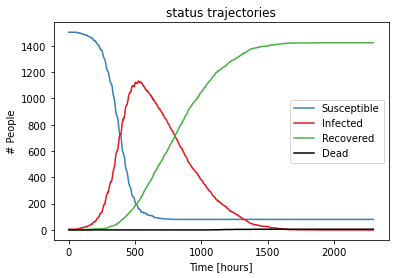

(array([5.199090e+05, 0.000000e+00, 1.456916e+06, 0.000000e+00,
        3.632930e+05, 0.000000e+00, 6.600800e+04, 0.000000e+00,
        1.213200e+04, 0.000000e+00, 2.487000e+03, 0.000000e+00,
        4.580000e+02, 0.000000e+00, 7.100000e+01, 0.000000e+00,
        1.100000e+01, 0.000000e+00, 0.000000e+00, 2.000000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

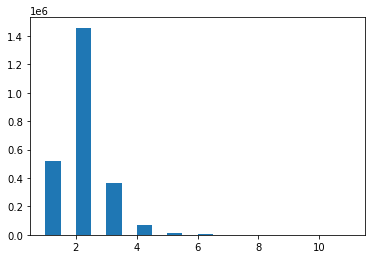

In [36]:
simulation1 = Simulation(modeledWorld1,800,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_matrix=False
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=500
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()

### interactions
df= simulation1.simulation_timecourse
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections, bins=20)

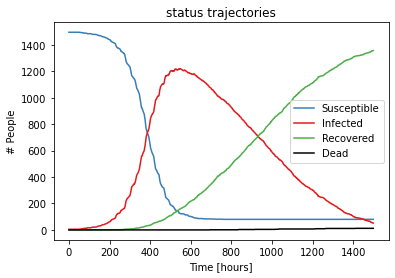

In [14]:
simulation1 = Simulation(modeledWorld1,200,run_immediately=False)
simulation1.simulate()
simulation1.plot_status_timecourse()

In [9]:
simulation2 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation2.interaction_matrix=False

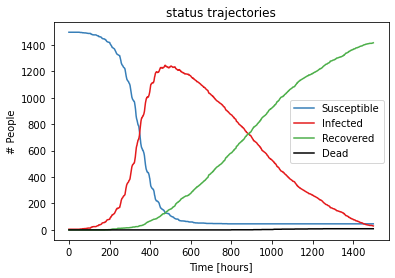

In [10]:
simulation2.simulate()
simulation2.plot_status_timecourse()

In [44]:
simulation1.save('Bad_Feilnbach_SIM', date_suffix=False )

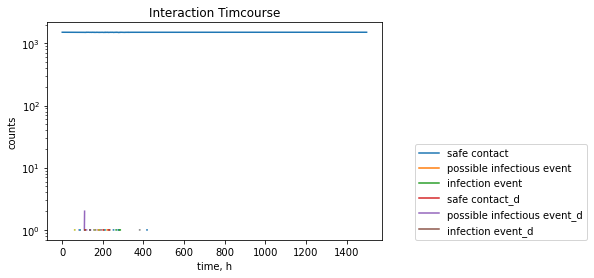

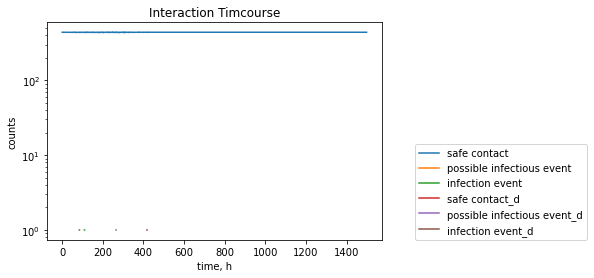

In [25]:
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=False)
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=True)

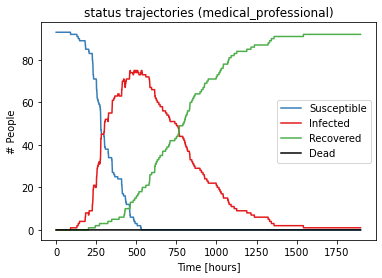

In [10]:
simulation1.plot_status_timecourse(specific_people='medical_professional')

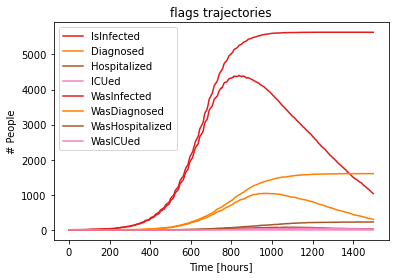

In [32]:
simulation1.plot_flags_timecourse()

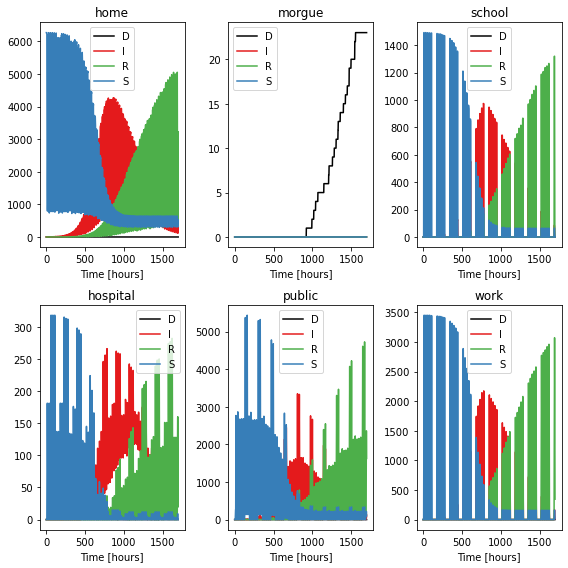

In [36]:
simulation2.plot_status_at_location()

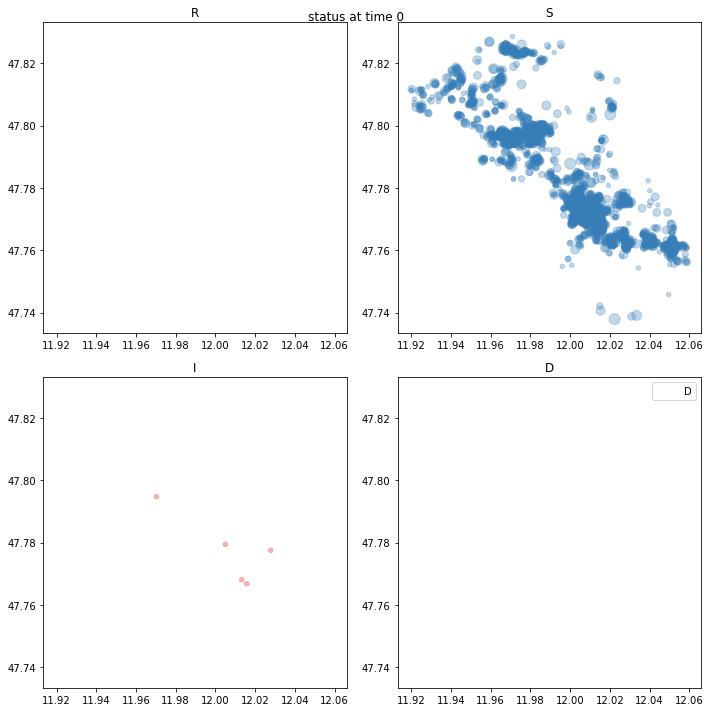

In [37]:
simulation1.map_status_at_loc(save_figure=False,time_steps=1)

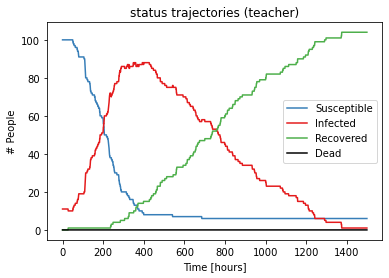

In [18]:
simulation1.plot_status_timecourse(specific_people='teacher')

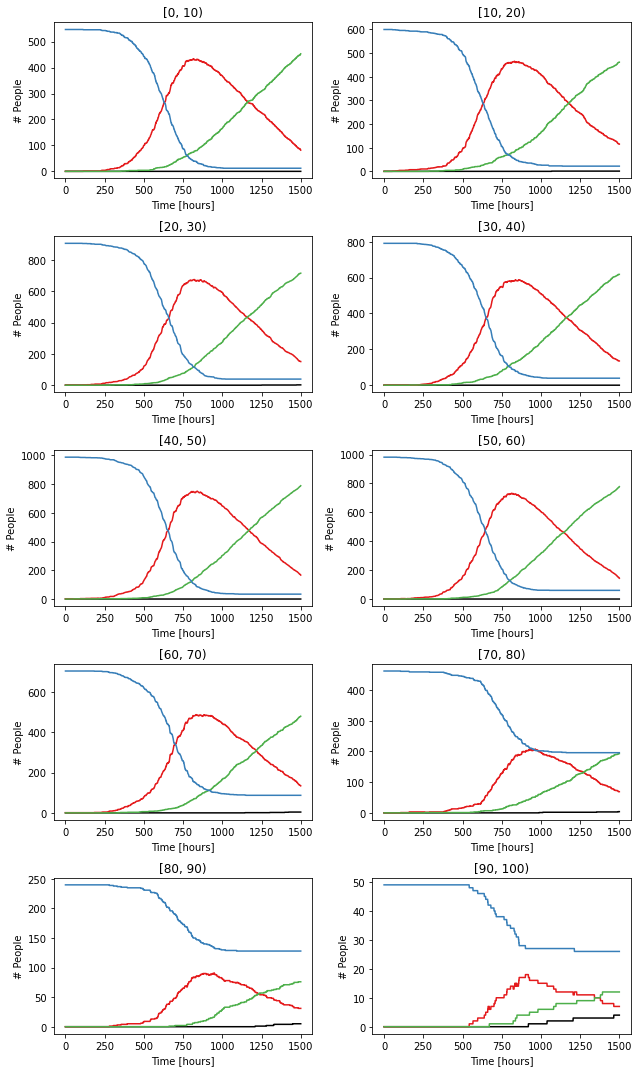

In [38]:
simulation1.plot_age_groups_status_timecourse()